## Feature extraction. 
### This lab is the continuation of "Cleaning Categorical Data". It starts in row 37

In [1]:
# 1.Import the necessary libraries if you are starting a new notebook.
import numpy as np
import pandas as pd
import datetime
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

pd.options.display.max_columns = 100

In [2]:
#2 Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [ ]:
# Let´s look into the data

In [3]:
customer_df.shape  # 24 columms

(9134, 24)

In [4]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info() # We check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
categoricals = customer_df.select_dtypes(object) # check for categoricals

In [7]:
categoricals.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
numericals = customer_df.select_dtypes(include ="number") # check for categoricals

In [9]:
numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [ ]:
# 3. What should we do with the customer_id column?

In [10]:
# Lets drop customer_id
customer_df.drop(['Customer','Effective To Date'], axis = 1,inplace = True)

In [11]:
customer_df.head(5) # We check

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:

# 4. Load the continuous and discrete variables into numericals_df and categorical_df variables

In [13]:
numerical_df = customer_df.select_dtypes(include='number')
categorical_df = customer_df.select_dtypes(include='object')

In [14]:
numerical_df.head(5)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [15]:
categorical_df .head(5)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [16]:
# 5. Plot every categorical variable. In each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

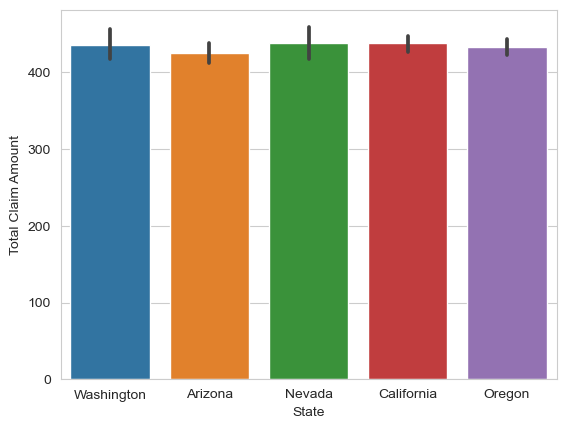

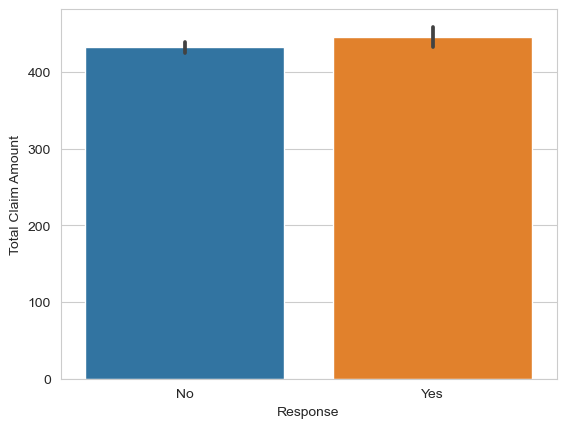

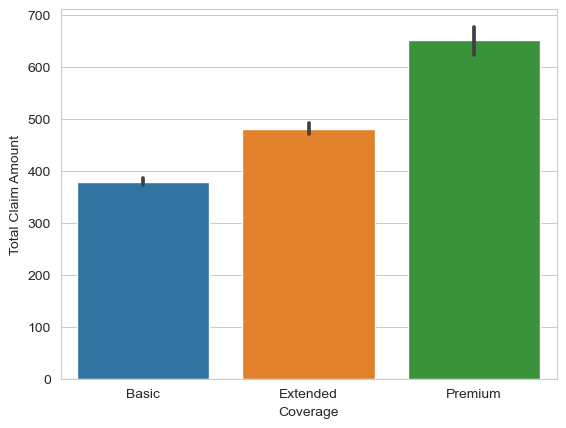

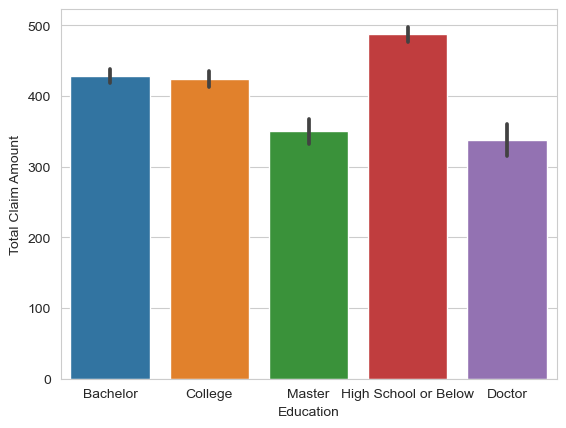

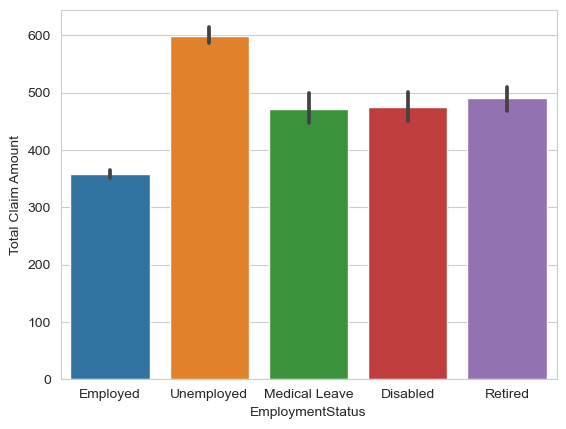

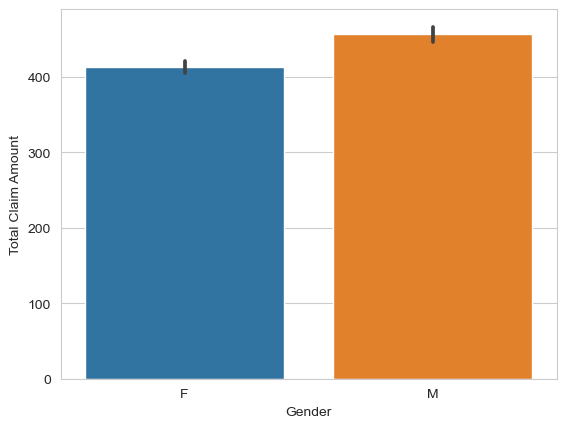

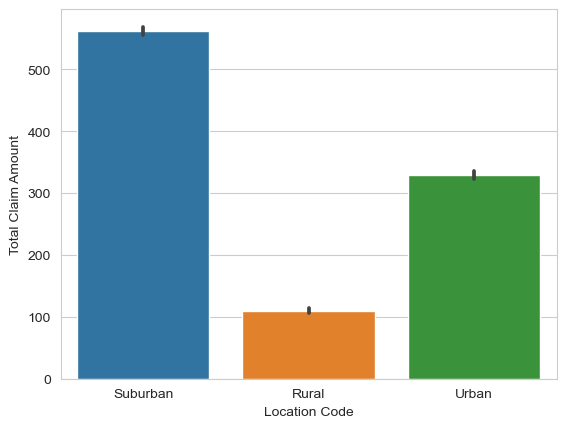

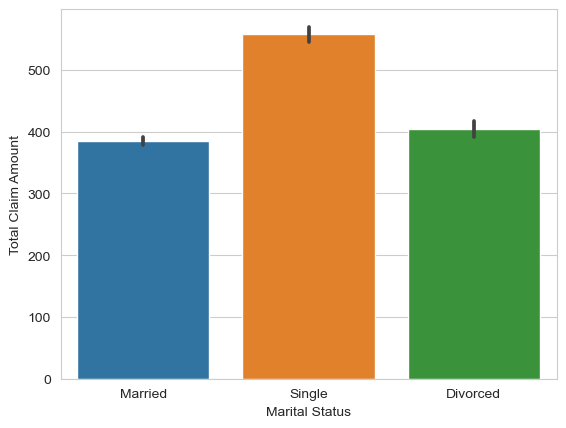

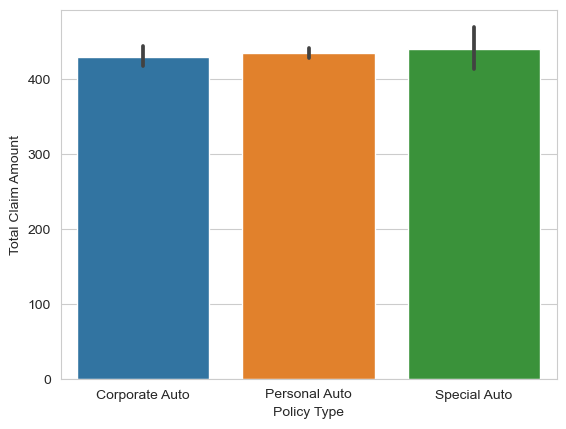

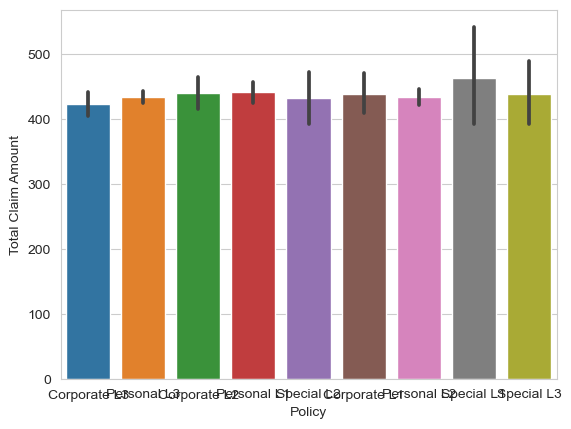

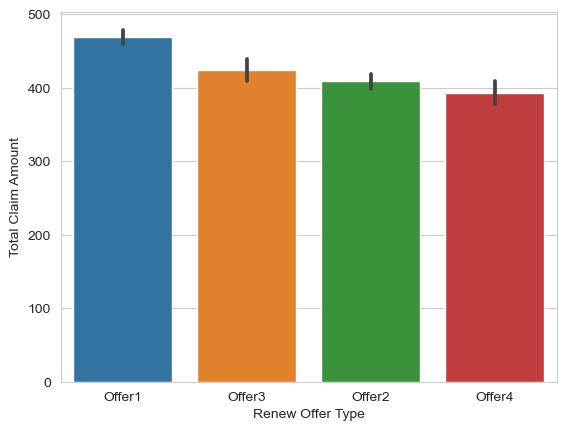

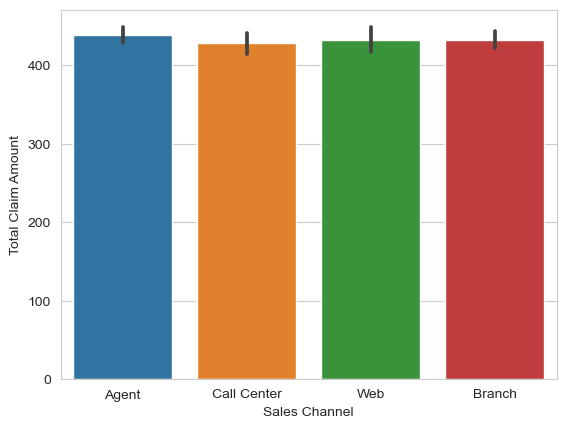

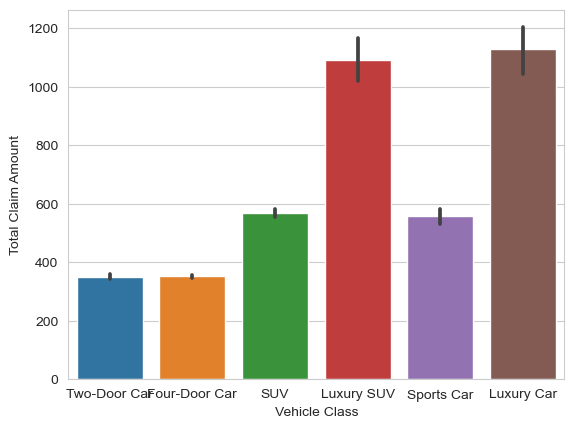

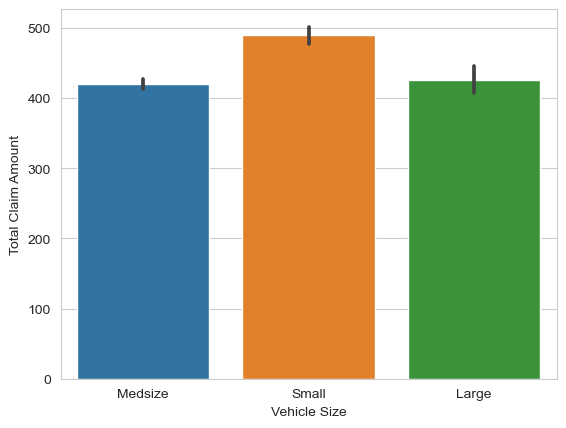

In [19]:
for i in categorical_df.columns:
    sns.barplot(x = categorical_df[i], y = customer_df['Total Claim Amount'])
    plt.show()

In [36]:
# 6. For the categorical data, check if there is any data cleaning that need to perform.

# Lets check unique values for all columns
for i in categorical_df.columns:
     print(categorical_df[i].value_counts())
    

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
F    4658
M    4476
Name: Gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [ ]:
# Many of the categorical variables should be cleaned in order to reduce unique values and imbalance 

## Feature Extraction Lab

In [37]:
# 1. Open the categoricals variable we created before. 
# We already have our categorical variable:
categorical_df.head(5)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


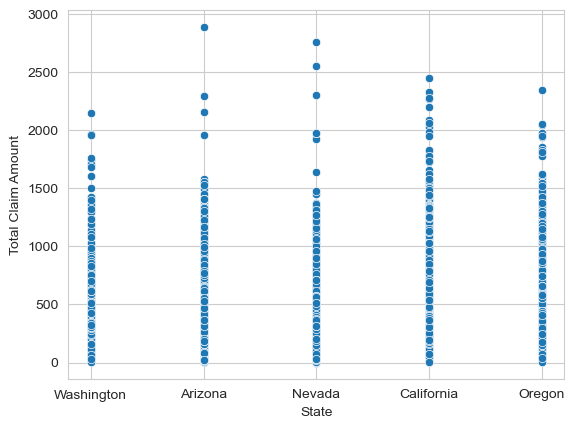

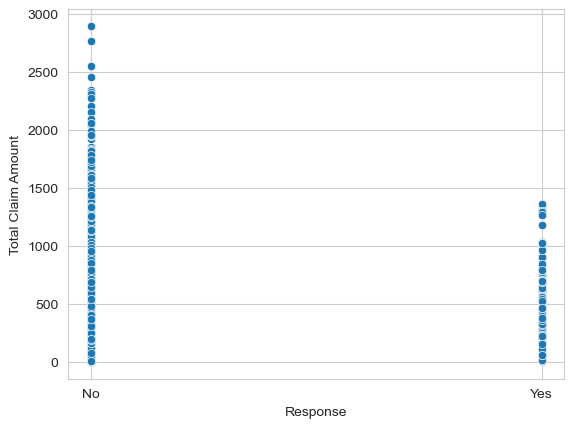

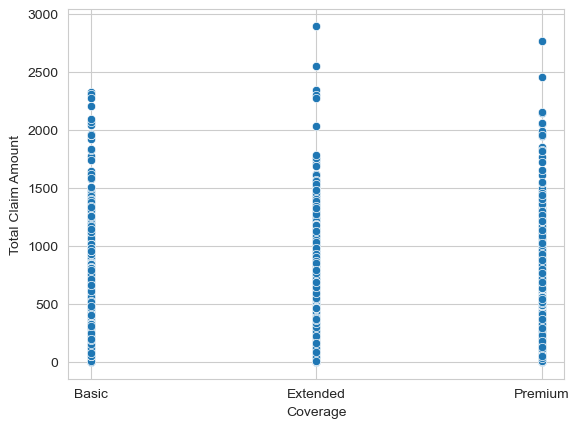

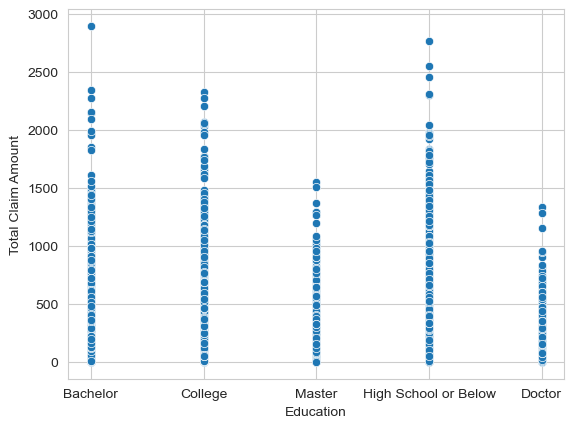

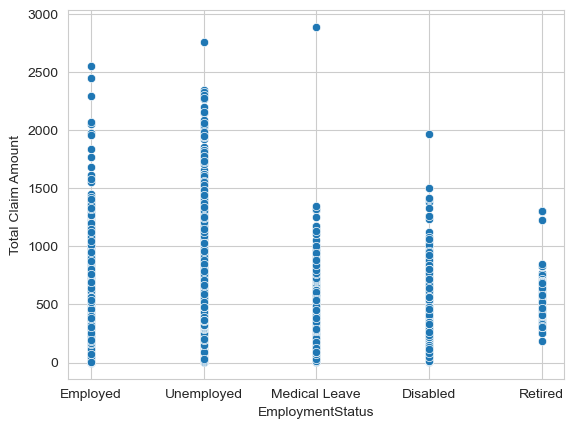

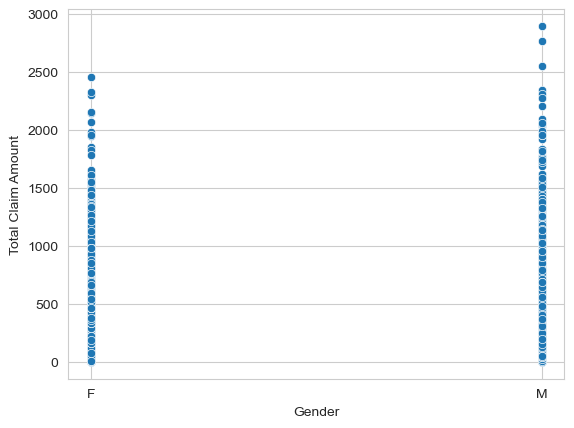

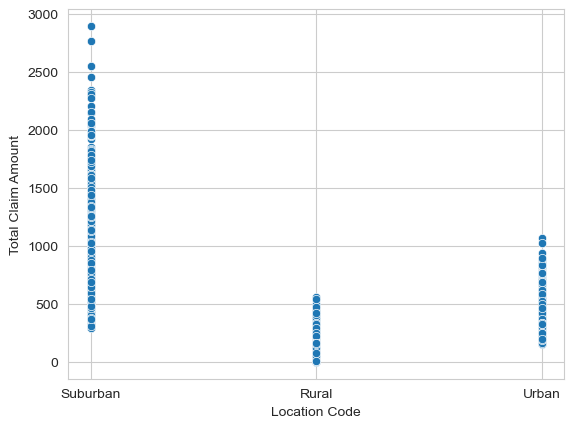

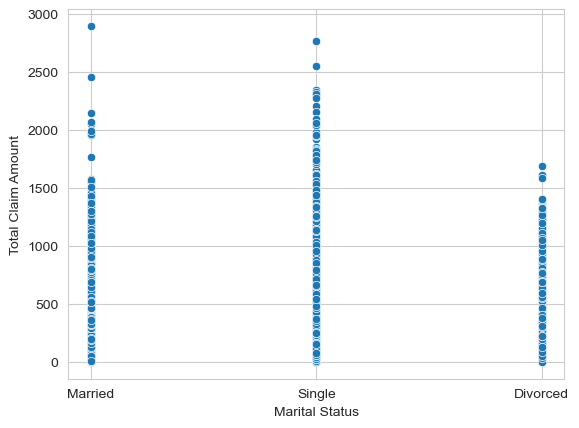

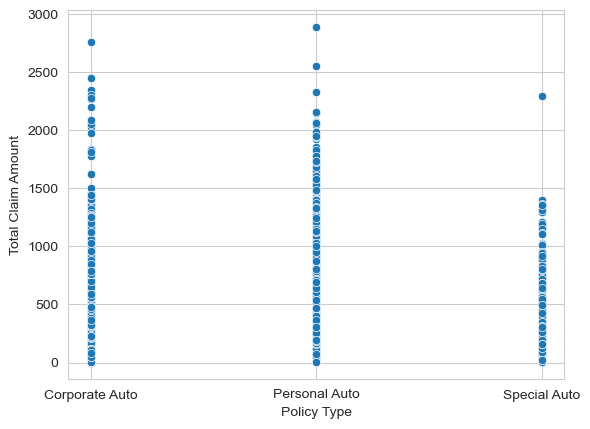

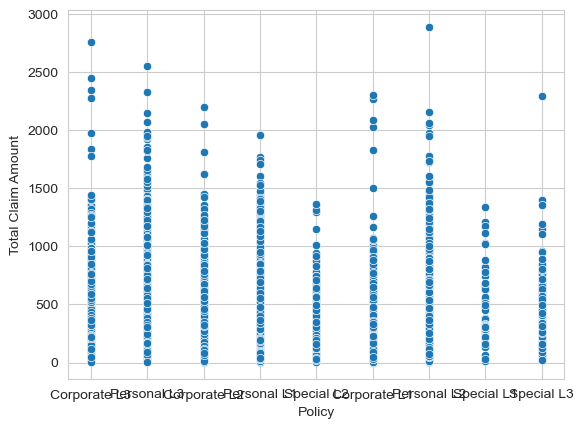

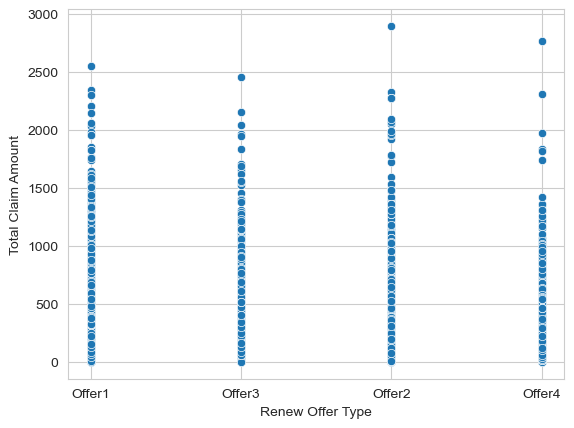

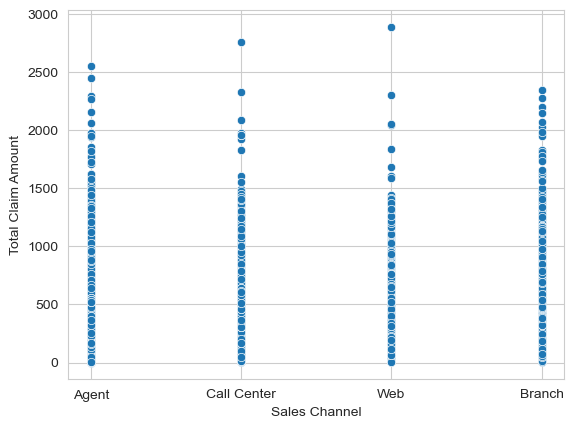

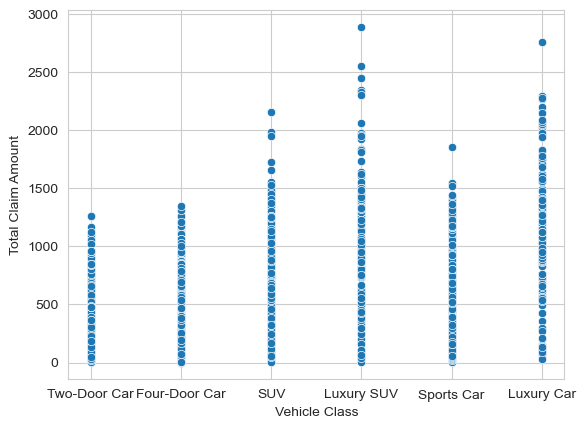

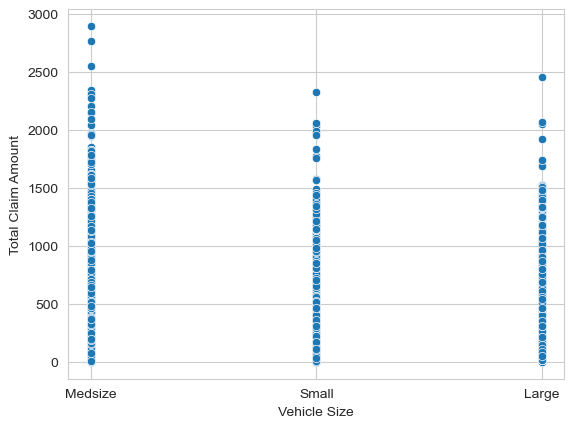

In [40]:
# 2. Plot all the categorical variables with the proper plot. What can you see?
# For categorical variables, we can use the following plots in order to extract information:
# -boxplot,scatterplot and countplot (for frequency distribution)

col = categorical_df.columns

for i in col:
    sns.scatterplot(x = categorical_df[i], y = customer_df['Total Claim Amount'])
    plt.show()

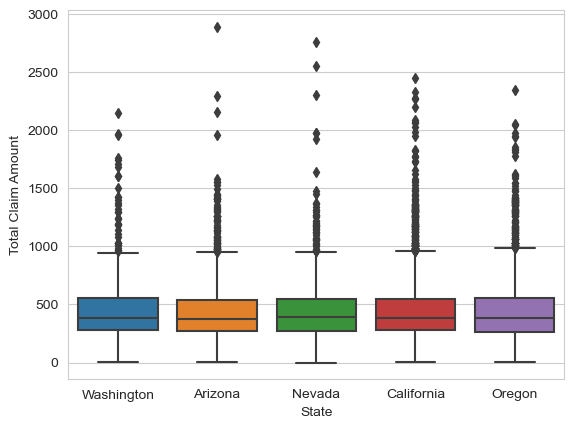

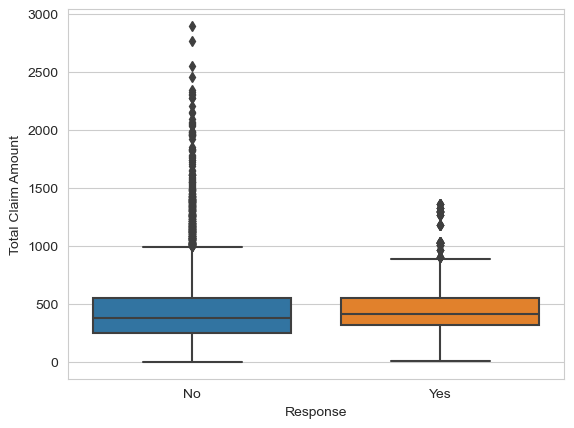

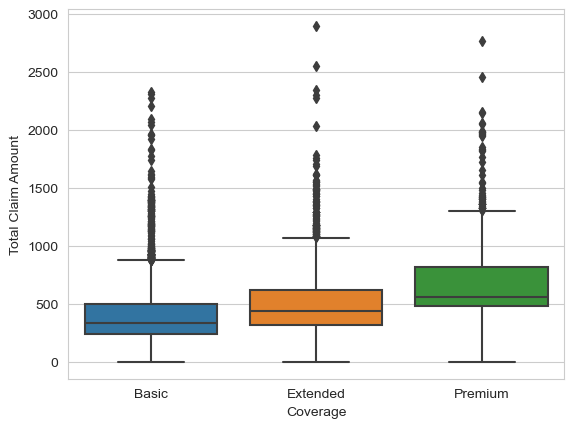

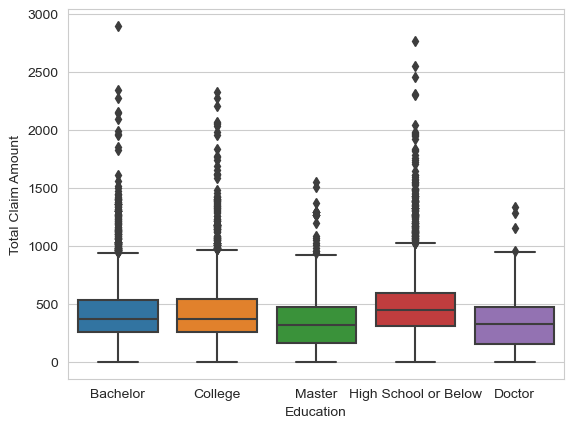

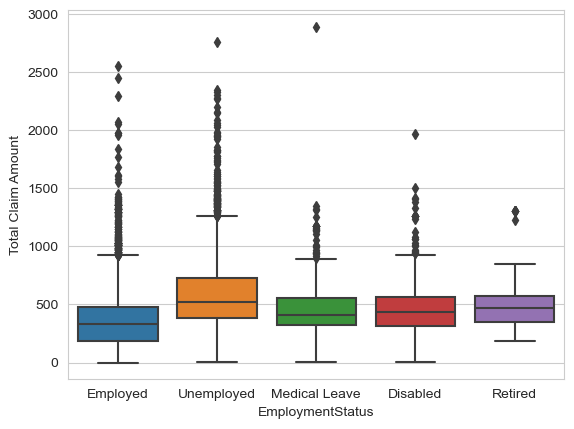

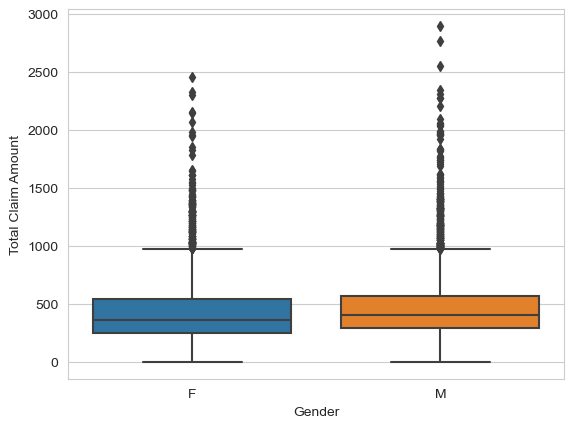

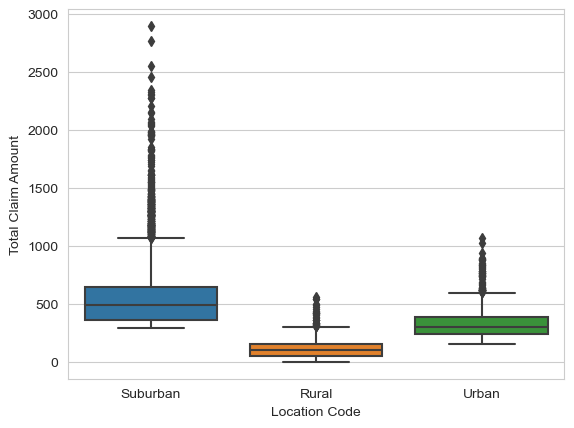

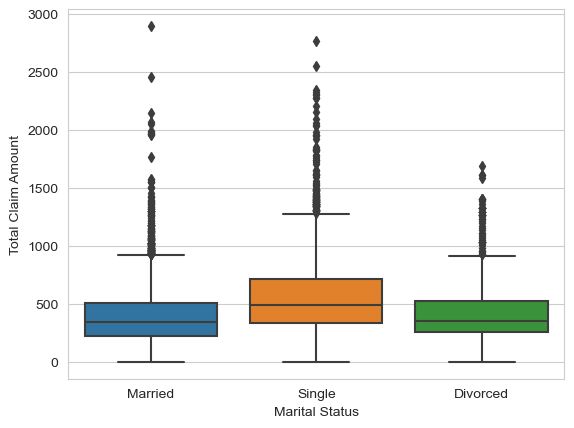

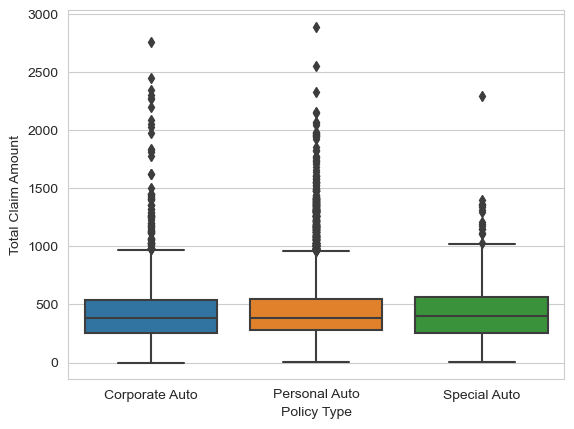

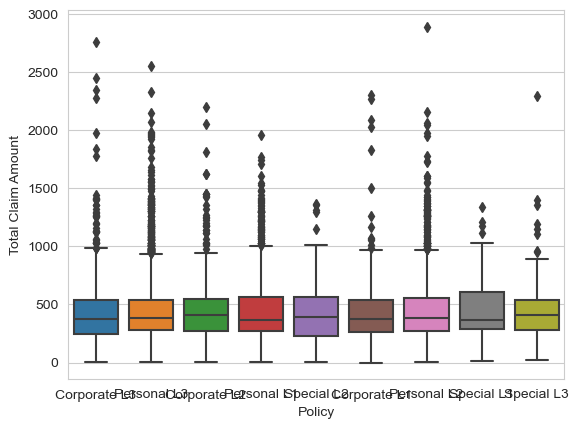

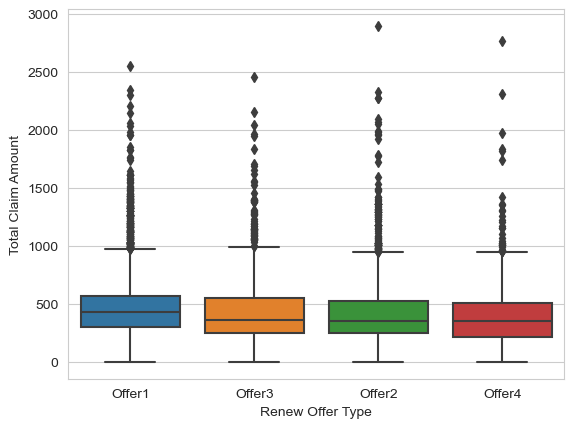

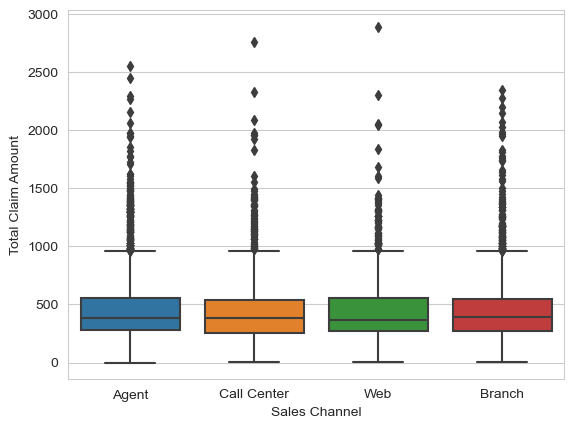

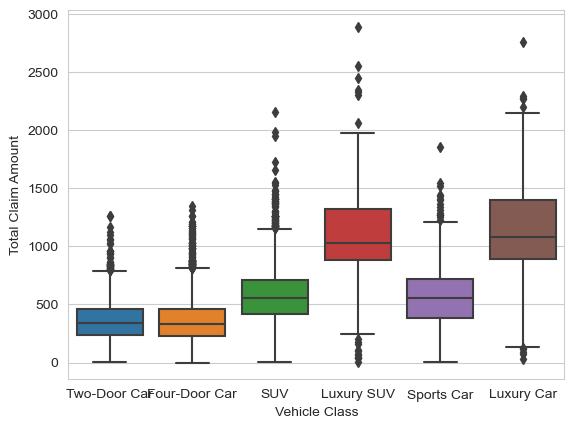

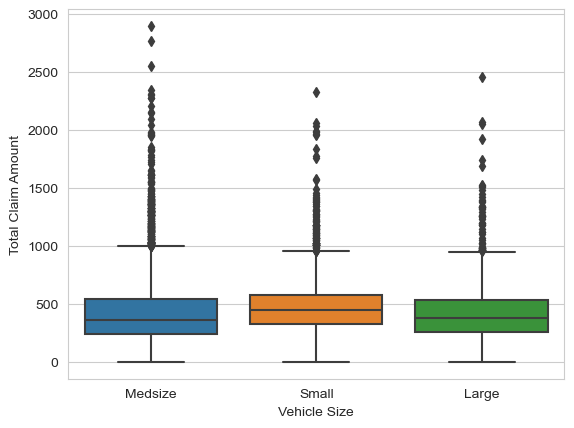

In [64]:
for i in col:
    sns.boxplot(x = categorical_df[i], y = customer_df['Total Claim Amount'])
    plt.show()

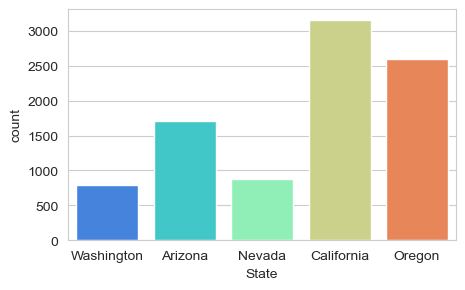

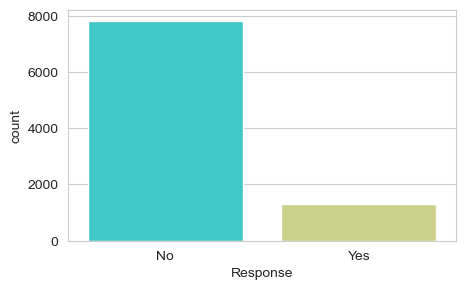

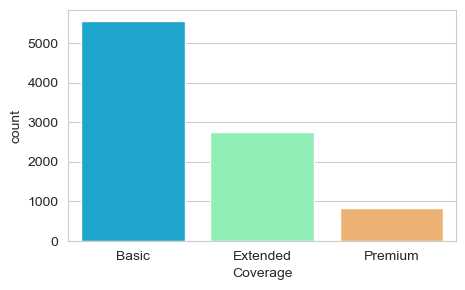

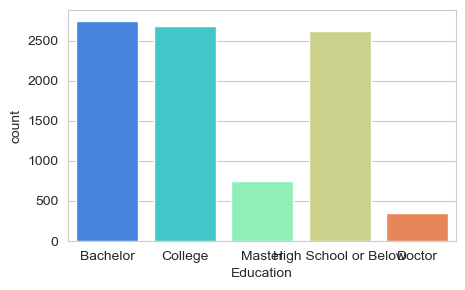

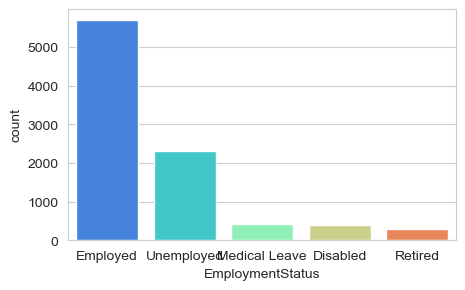

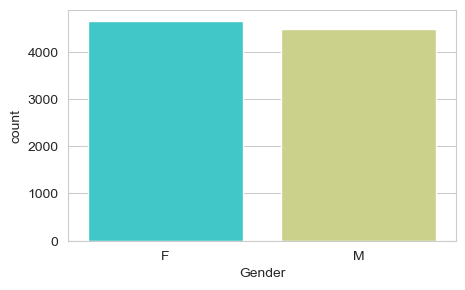

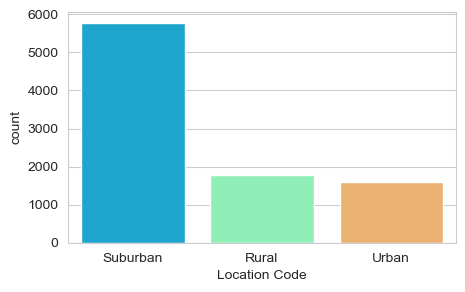

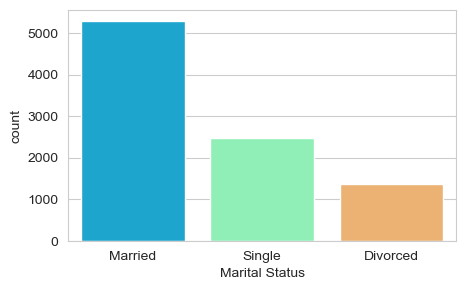

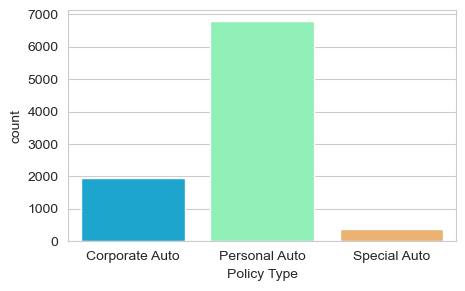

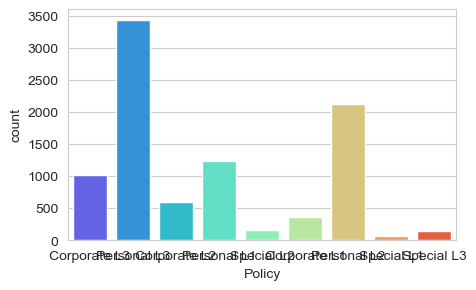

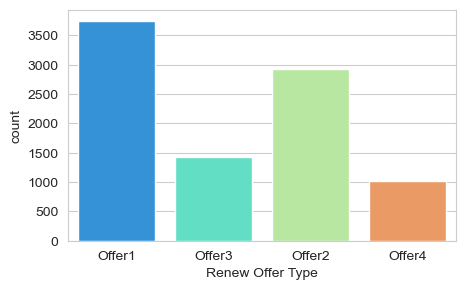

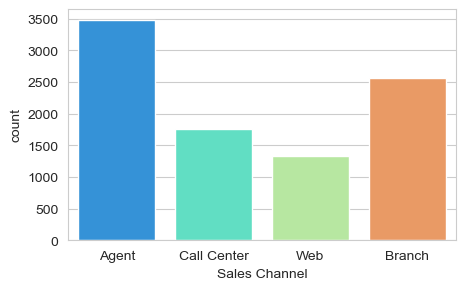

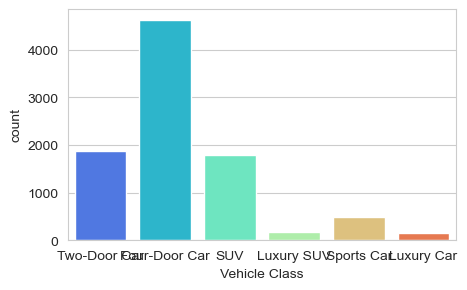

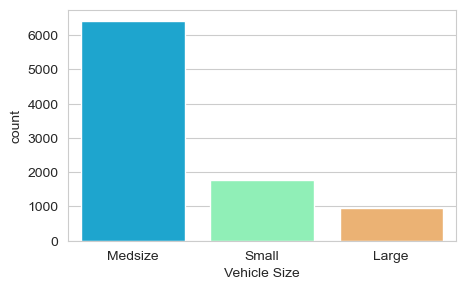

In [90]:
# For count plot we need to create a graph for every iteration of the loop


for i in col:
    
    plt.figure(figsize=(5,3))
    if ((categorical_df[i].dtype == np.float64)):
        i=0
    else:
        sns.countplot(x=categorical_df[i], data=customer_df,palette="rainbow")
        plt.show()
    

In [89]:
#### We see that many categorical variables don´t seem to have much relationship with "Total Claim Amount"
#### We can see as well that some of them might be redundant such as:Vehicle size, Location code and Marital Status. We can drop Location code and Marital status

In [119]:
#4. Plot time variable. Can you extract something from it?

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


import matplotlib.pyplot as plt
import matplotlib.dates as dt
import datetime



In [103]:
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

In [115]:
customer_df['EFD_day'] = customer_df['Effective To Date'].dt.day

In [116]:
customer_df['EFD_day'].head(10)

0    24
1    31
2    19
3    20
4     3
5    25
6    24
7    18
8    26
9    17
Name: EFD_day, dtype: int64

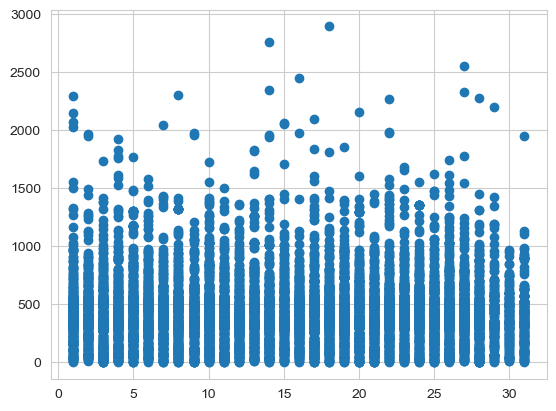

In [118]:
plt.scatter(customer_df['EFD_day'],customer_df['Total Claim Amount'])

In [ ]:
# We can see there is no clear realtionship between the day of the month and Total Claim Amount